<a href="https://colab.research.google.com/github/Blessing-Mvana-Nhlozi/Physics-Hons-Project/blob/main/Gas_Sensor_Conductivity_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Importing Libraries

In [1]:
import os
import warnings
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib import rcParams as rcP
import seaborn as sns
from math import e
from scipy.interpolate import interp1d
%matplotlib inline
%pylab inline 

Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.7/dist-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['e']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


##Loading Data

In [3]:
# exp_data_pd is the experimental data in pandas data frame
df=pd.read_csv('https://raw.githubusercontent.com/Blessing-Mvana-Nhlozi/Physics-Hons-Project/main/Gas_Sensors_Experimental_Data_Blessing.csv?token=AVABSYBNBZNGFLRKQYWYQSDBTM7A2', sep=';')

##Preprocessing

### Creating a Base Simulation

In [4]:
# creating a function that will simulate the relative conductivity 
t=np.linspace(0,12.5,100)
def f(x,y):
    b=df.Time
    a=e**(y*b)
    return x*(1-a)

#the simulation of the relative change in conductivity
NO2=f(-0.00117,-0.79159)+0.0028
HCHO=f(0.000481262,-1.55827)+0.0028
MIXED=f(-0.00117,-0.79159)+f(0.000481262,-1.55827)+0.0028



### creating a pandas data frame of the Experimental Data and the base Simulation

In [5]:
# Pandas DataFrame from a dictionary:
dic={'period':df.Time,
     '$HCHO$ Exp Data Points':df.HCHO.to_list(),
     '$HCHO$ Simulation':HCHO,
     '$NO_2$ Exp Data Points':df.NO2.to_list(),
     '$NO_2$ Simulation':NO2,
     'Mixture Exp Data Points':df.MIXTURE.to_list(),
     'Mixture Simulation':MIXED}
df2=pd.DataFrame(dic)
df2

,period,$HCHO$ Exp Data Points,$HCHO$ Simulation,$NO_2$ Exp Data Points,$NO_2$ Simulation,Mixture Exp Data Points,Mixture Simulation
0,0.0,0.00280,0.002800,0.002800,0.002800,0.002800,0.002800
1,0.1,0.00285,0.002869,0.002800,0.002711,0.002800,0.002780
2,0.2,0.00290,0.002929,0.002800,0.002629,0.002800,0.002758
3,0.5,0.00300,0.003060,0.002800,0.002418,0.002800,0.002678
4,0.7,0.00310,0.003120,0.002600,0.002302,0.002700,0.002622
5,0.9,0.00315,0.003163,0.002400,0.002204,0.002220,0.002567
6,1.0,0.00317,0.003180,0.002160,0.002160,0.002250,0.002540
7,1.2,0.00319,0.003207,0.002120,0.002083,0.002250,0.002490
8,1.4,0.00323,0.003227,0.001980,0.002016,0.002300,0.002443
9,2.0,0.00328,0.003260,0.001900,0.001870,0.002230,0.002330


### plotting the Experimental Data and the base Simulation

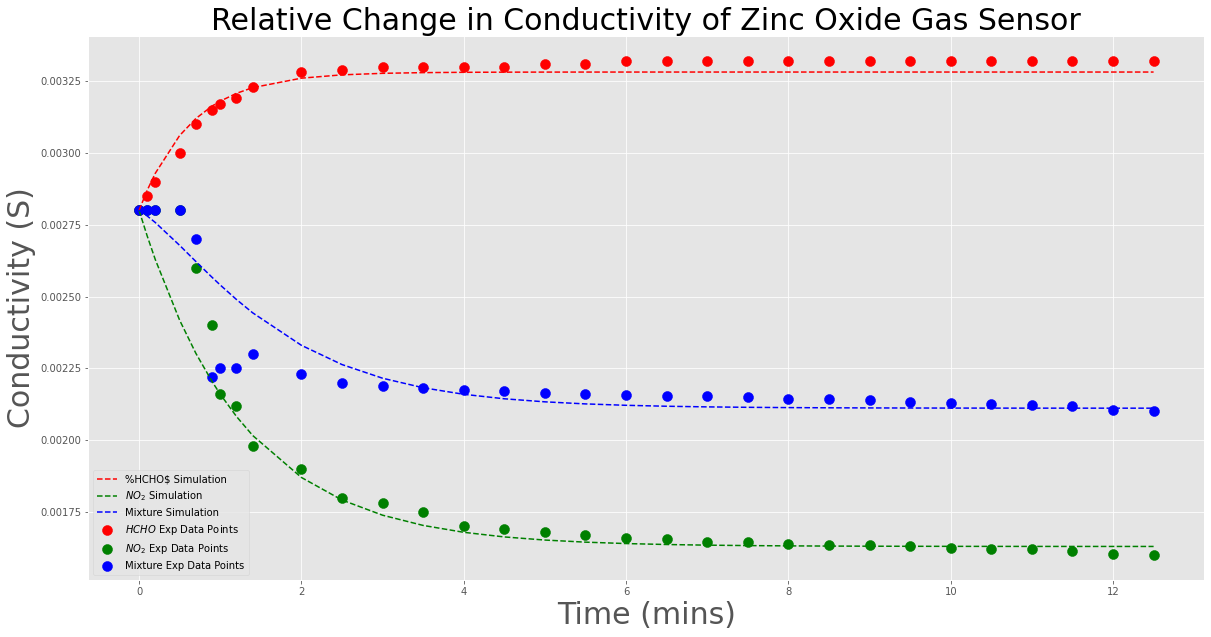

In [6]:
style.use('ggplot')
rcP['figure.figsize']=20,10
plt.scatter(df.Time, df.HCHO, label='$HCHO$ Exp Data Points', alpha=1,color='red',s=100)
plt.plot(df.Time, HCHO, 'r--',label='%HCHO$ Simulation')

plt.scatter(df.Time, df.NO2, label='$NO_2$ Exp Data Points', alpha=1,color='green',s=100)
plt.plot(df.Time, NO2,'g--', label='$NO_2$ Simulation')

plt.scatter(df.Time, df.MIXTURE, label='Mixture Exp Data Points', alpha=1,color='blue',s=100)
plt.plot(df.Time, MIXED,'b--', label='Mixture Simulation')

plt.xlabel('Time (mins)', {'size': 30})
plt.ylabel('Conductivity (S)', {'size': 30})
plt.title('Relative Change in Conductivity of Zinc Oxide Gas Sensor', {'size': 30})
plt.legend();

###Interpolating the data and plotting it

In [7]:
f1 = interp1d(df.Time, df.HCHO, kind='cubic')
f2 = interp1d(df.Time, df.NO2, kind='cubic')
f3 = interp1d(df.Time, df.MIXTURE, kind='cubic')
xnew = np.linspace(0, 12.5, num=126, endpoint=True)

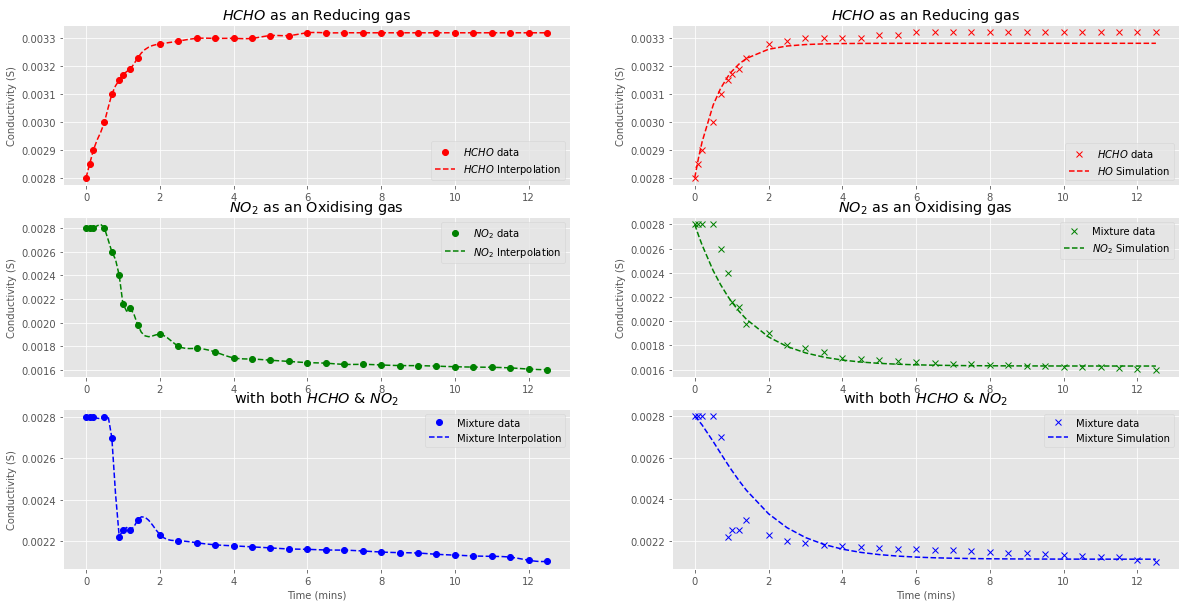

In [8]:
plt.subplot(321)
plt.plot(df.Time,df.HCHO, 'ro', )
plt.plot(xnew, f1(xnew), 'r--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$HCHO$ data', '$HCHO$ Interpolation'], loc='best')
plt.title('$HCHO$ as an Reducing gas')

plt.subplot(322)
plt.plot(df.Time, df.HCHO, 'rx')
plt.plot(df.Time, HCHO, 'r--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$HCHO$ data', '$HO$ Simulation'], loc='best')
plt.title('$HCHO$ as an Reducing gas')

plt.subplot(323)
plt.plot(df.Time, df.NO2, 'go')
plt.plot(xnew, f2(xnew), 'g--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$NO_2$ data', '$NO_2$ Interpolation'], loc='best')
plt.title('$NO_2$ as an Oxidising gas')

plt.subplot(324)
plt.plot(df.Time, df.NO2,'gx')
plt.plot(df.Time, NO2,'g--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['Mixture data', '$NO_2$ Simulation'], loc='best')
plt.title('$NO_2$ as an Oxidising gas')

plt.subplot(325)
plt.plot(df.Time, df.MIXTURE, 'bo')
plt.plot(xnew, f3(xnew), 'b--')
plt.xlabel('Time (mins)', {'size': 10})
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['Mixture data', 'Mixture Interpolation'], loc='best')
plt.title('with both $HCHO$ & $NO_2$')

plt.subplot(326)
plt.plot(df.Time, df.MIXTURE, 'bx')
plt.plot(df.Time, MIXED,'b--')
plt.xlabel('Time (mins)', {'size': 10})
plt.legend(['Mixture data', 'Mixture Simulation'], loc='best')
plt.title('with both $HCHO$ & $NO_2$')


plt.show()

Text(0.5, 1.0, 'Relative Change in Conductivity of Zinc Oxide Gas Sensor')

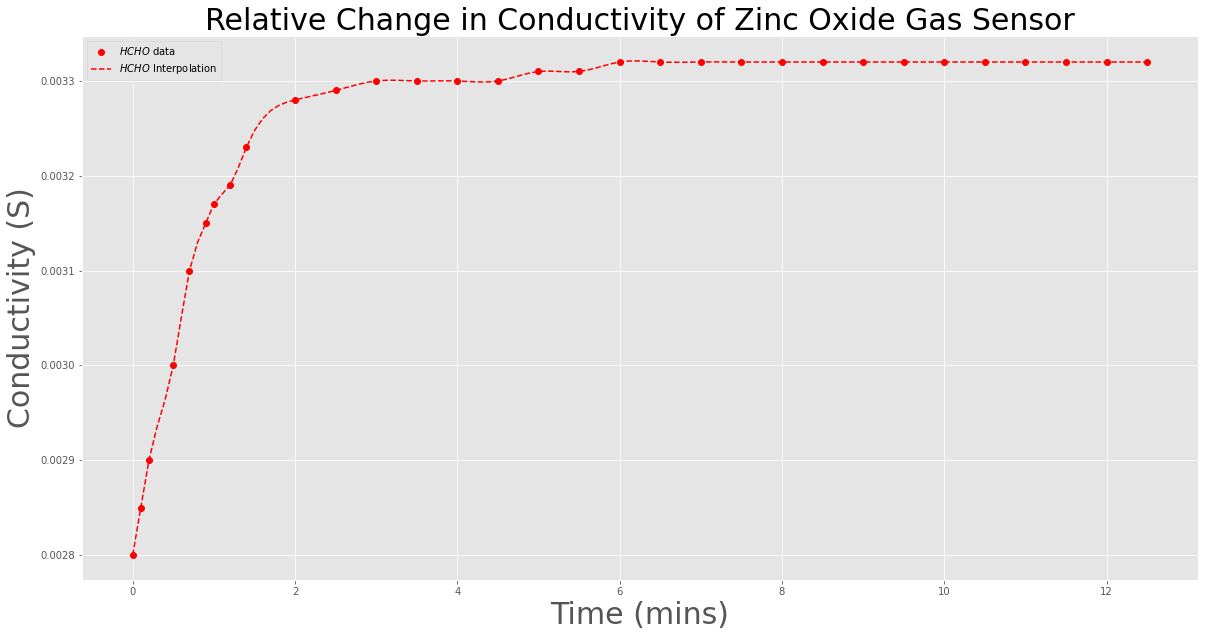

In [32]:
plt.plot(df.Time,df.HCHO, 'ro', )
plt.plot(xnew, f1(xnew), 'r--')
plt.legend(['$HCHO$ data', '$HCHO$ Interpolation'], loc='best')
plt.xlabel('Time (mins)', {'size': 30})
plt.ylabel('Conductivity (S)', {'size': 30})
plt.title('Relative Change in Conductivity of Zinc Oxide Gas Sensor', {'size': 30})

Text(0.5, 1.0, 'Relative Change in Conductivity of Zinc Oxide Gas Sensor')

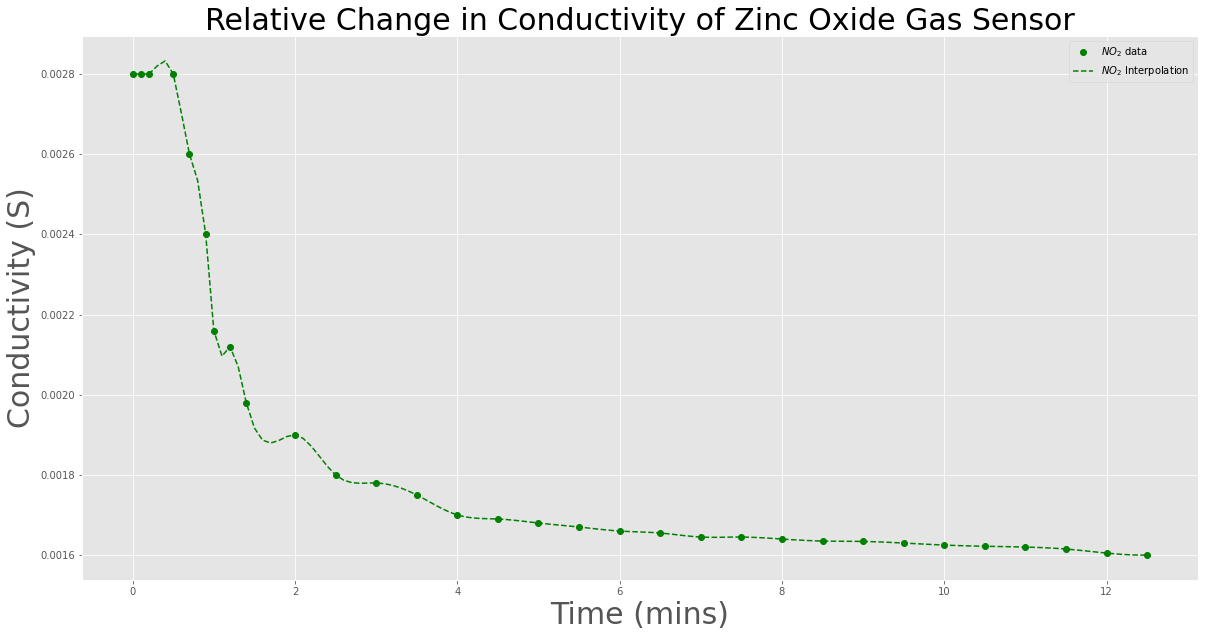

In [33]:
plt.plot(df.Time, df.NO2, 'go')
plt.plot(xnew, f2(xnew), 'g--')
plt.legend(['$NO_2$ data', '$NO_2$ Interpolation'], loc='best')
plt.xlabel('Time (mins)', {'size': 30})
plt.ylabel('Conductivity (S)', {'size': 30})
plt.title('Relative Change in Conductivity of Zinc Oxide Gas Sensor', {'size': 30})

Text(0.5, 1.0, 'Relative Change in Conductivity of Zinc Oxide Gas Sensor')

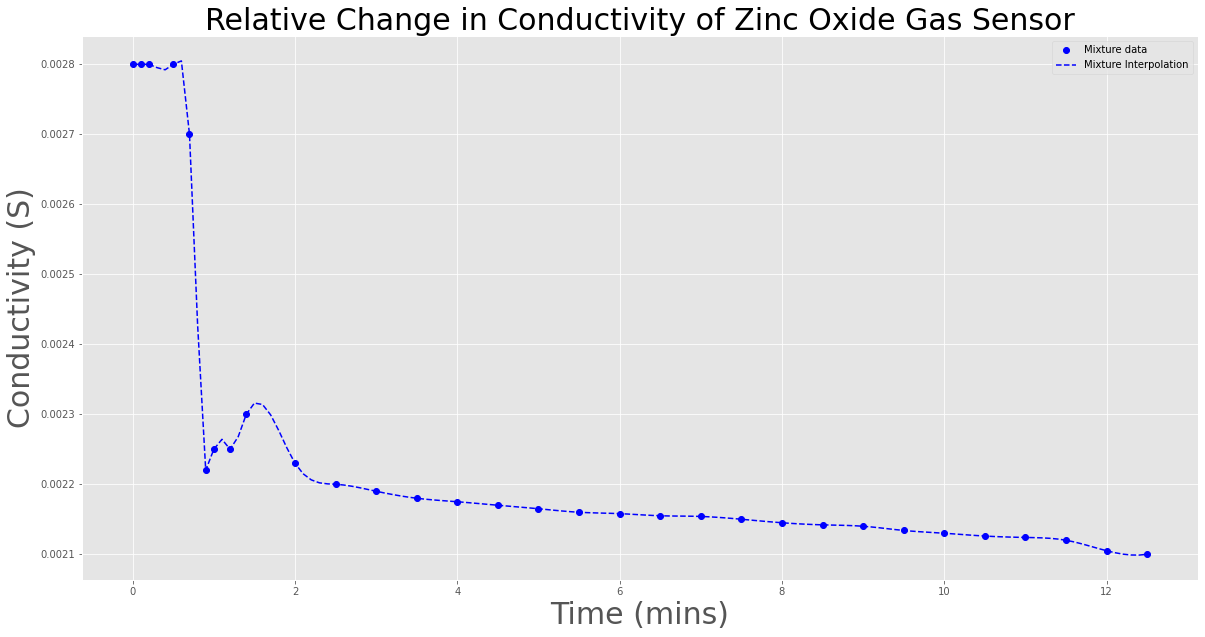

In [34]:
plt.plot(df.Time, df.MIXTURE, 'bo')
plt.plot(xnew, f3(xnew), 'b--')
plt.legend(['Mixture data', 'Mixture Interpolation'], loc='best')
plt.xlabel('Time (mins)', {'size': 30})
plt.ylabel('Conductivity (S)', {'size': 30})
plt.title('Relative Change in Conductivity of Zinc Oxide Gas Sensor', {'size': 30})

In [9]:
def D(x,y):
    yprime=np.diff(y)/np.diff(x)
    for i in range(len((yprime))):
        xprime=(x[i+1]+x[i])/2
        return xprime,yprime

In [10]:
xprime,HCHOprime=D(df.Time, df.HCHO)
xprime,NO2prime=D(df.Time, df.NO2)
xprime,MIXTUREprime=D(df.Time, df.MIXTURE)


xDP,HCHODP=D(df.Time[0:-1],HCHOprime)
xDP,NO2DP=D(df.Time[0:-1],NO2prime)
xDP,MIXTUREDP=D(df.Time[0:-1],MIXTUREprime)

In [11]:
f1prime = interp1d(df.Time[0:-1], HCHOprime, kind='cubic')
f2prime = interp1d(df.Time[0:-1], NO2prime, kind='cubic')
f3prime = interp1d(df.Time[0:-1], MIXTUREprime, kind='cubic')
xnew2=np.linspace(0, 12, num=2400, endpoint=True)

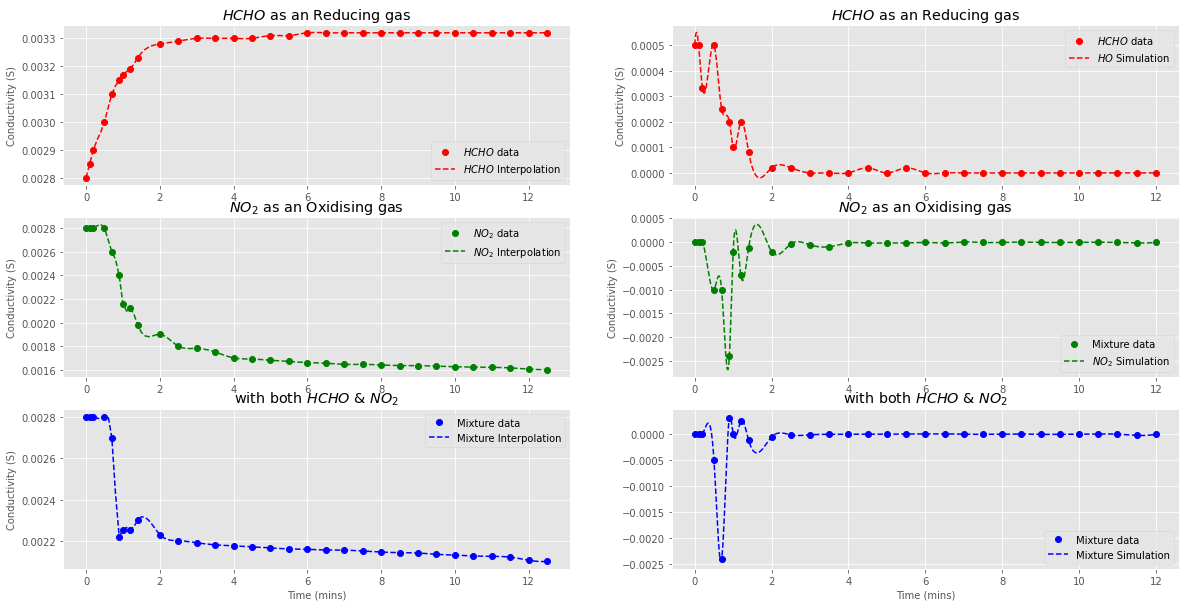

In [12]:
plt.subplot(321)
plt.plot(df.Time,df.HCHO, 'ro', )
plt.plot(xnew, f1(xnew), 'r--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$HCHO$ data', '$HCHO$ Interpolation'], loc='best')
plt.title('$HCHO$ as an Reducing gas')

plt.subplot(322)
plt.plot(df.Time[0:-1],HCHOprime, 'ro')
plt.plot(xnew2,f1prime(xnew2), 'r--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$HCHO$ data', '$HO$ Simulation'], loc='best')
plt.title('$HCHO$ as an Reducing gas')

plt.subplot(323)
plt.plot(df.Time, df.NO2, 'go')
plt.plot(xnew, f2(xnew), 'g--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$NO_2$ data', '$NO_2$ Interpolation'], loc='best')
plt.title('$NO_2$ as an Oxidising gas')

plt.subplot(324)
plt.plot(df.Time[0:-1],NO2prime,'go')
plt.plot(xnew2,f2prime(xnew2), 'g--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['Mixture data', '$NO_2$ Simulation'], loc='best')
plt.title('$NO_2$ as an Oxidising gas')

plt.subplot(325)
plt.plot(df.Time, df.MIXTURE, 'bo')
plt.plot(xnew, f3(xnew), 'b--')
plt.xlabel('Time (mins)', {'size': 10})
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['Mixture data', 'Mixture Interpolation'], loc='best')
plt.title('with both $HCHO$ & $NO_2$')

plt.subplot(326)
plt.plot(df.Time[0:-1],MIXTUREprime, 'bo')
plt.plot(xnew2,f3prime(xnew2), 'b--')
plt.xlabel('Time (mins)', {'size': 10})
plt.legend(['Mixture data', 'Mixture Simulation'], loc='best')
plt.title('with both $HCHO$ & $NO_2$')


plt.show()

Text(0.5, 0, 'Time (min)')

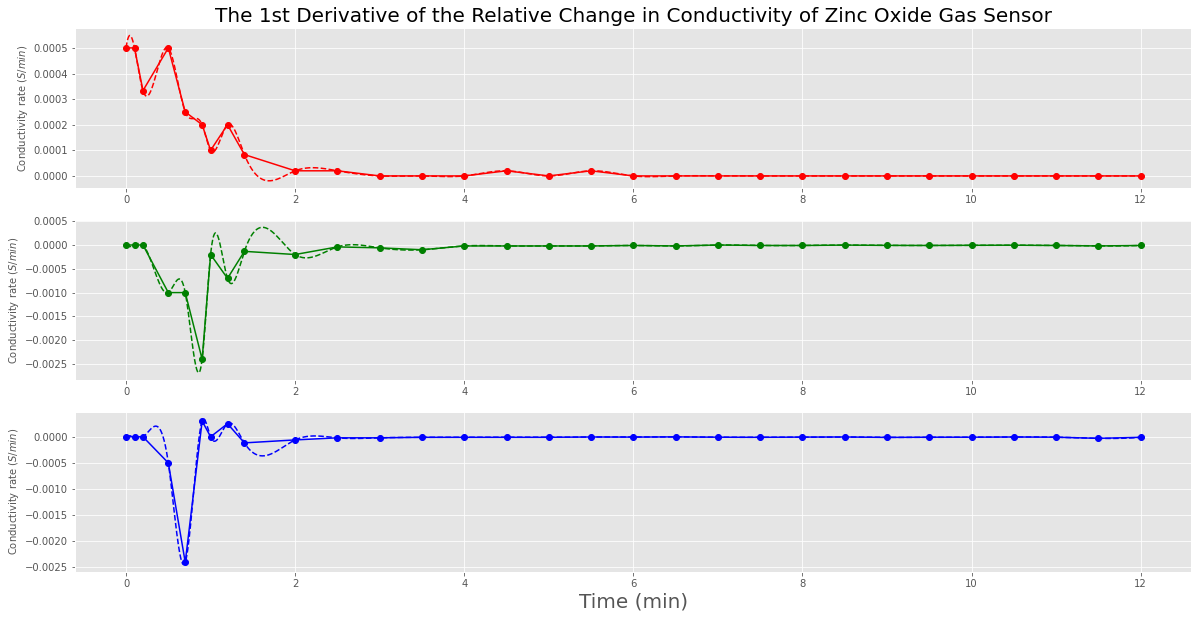

In [45]:
subplot(311)
plt.title('The 1st Derivative of the Relative Change in Conductivity of Zinc Oxide Gas Sensor', {'size': 20})
plt.ylabel('Conductivity rate ($S/min$)', {'size': 10})
plt.plot(df.Time[0:-1],HCHOprime, 'ro')
plt.plot(df.Time[0:-1],HCHOprime, 'r-')
plt.plot(xnew2,f1prime(xnew2), 'r--')

subplot(312)
plt.plot(df.Time[0:-1],NO2prime,'go')
plt.plot(df.Time[0:-1],NO2prime,'g-')
plt.plot(xnew2,f2prime(xnew2), 'g--')
plt.ylabel('Conductivity rate ($S/min$)', {'size': 10})

subplot(313)
plt.plot(df.Time[0:-1],MIXTUREprime, 'bo')
plt.plot(df.Time[0:-1],MIXTUREprime, 'b-')
plt.plot(xnew2,f3prime(xnew2), 'b--')
plt.ylabel('Conductivity rate ($S/min$)', {'size': 10})
plt.xlabel('Time (min)', {'size': 20})

In [13]:
f1dp = interp1d(df.Time[0:-2],HCHODP, kind='cubic')
f2dp = interp1d(df.Time[0:-2],NO2DP, kind='cubic')
f3dp = interp1d(df.Time[0:-2],MIXTUREDP, kind='cubic')
xnew3=np.linspace(0, 11.5, num=2400, endpoint=True)

Text(0.5, 0, 'Time (min)')

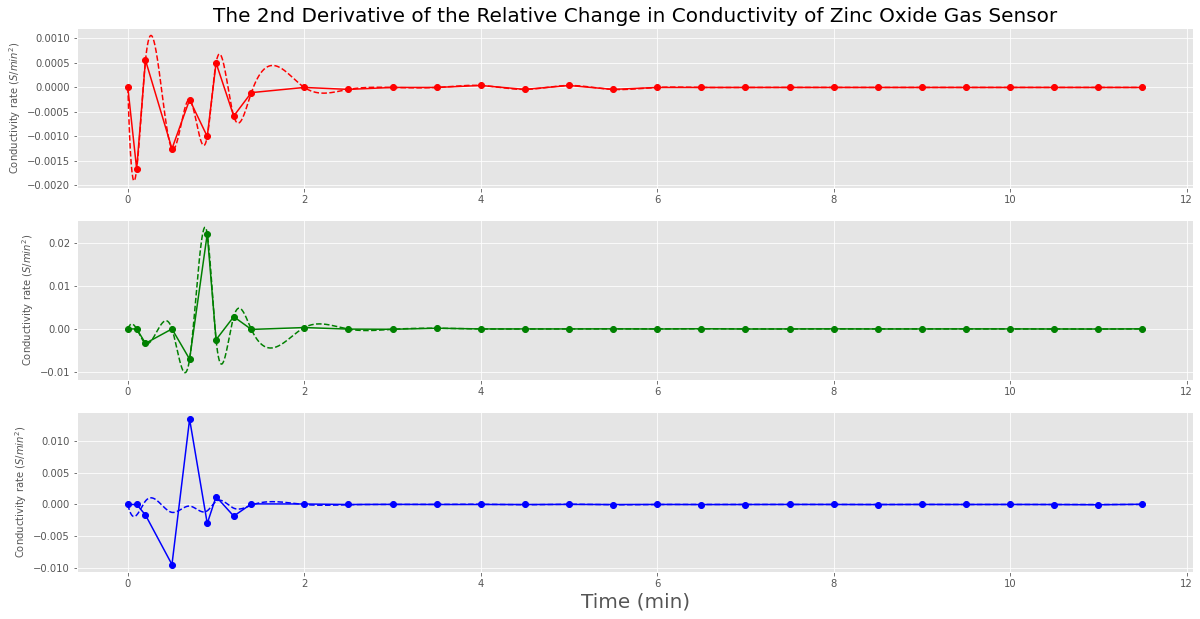

In [46]:
subplot(311)
plt.title('The 2nd Derivative of the Relative Change in Conductivity of Zinc Oxide Gas Sensor', {'size': 20})
plt.ylabel('Conductivity rate ($S/min^2$)', {'size': 10})
plt.plot(df.Time[0:-2],HCHODP, 'ro')
plt.plot(xnew3,f1dp(xnew3),'r--')
plt.plot(df.Time[0:-2],HCHODP,'r')

subplot(312)
plt.plot(df.Time[0:-2],NO2DP, 'go')
plt.plot(xnew3,f2dp(xnew3),'g--')
plt.plot(df.Time[0:-2],NO2DP,'g')
plt.ylabel('Conductivity rate ($S/min^2$)', {'size': 10})

subplot(313)
plt.plot(df.Time[0:-2],MIXTUREDP, 'bo')
plt.plot(xnew3,f1dp(xnew3),'b--')
plt.plot(df.Time[0:-2],MIXTUREDP,'b')
plt.ylabel('Conductivity rate ($S/min^2$)', {'size': 10})
plt.xlabel('Time (min)', {'size': 20})

In [15]:
def g(a,b,c,t=np.linspace(0,12.5,100)):
   d=-(t/b)**c
   f=e**d
   return a*f + (0.0028-a)

Text(0.5, 1.0, 'with both $HCHO$ & $NO_2$')

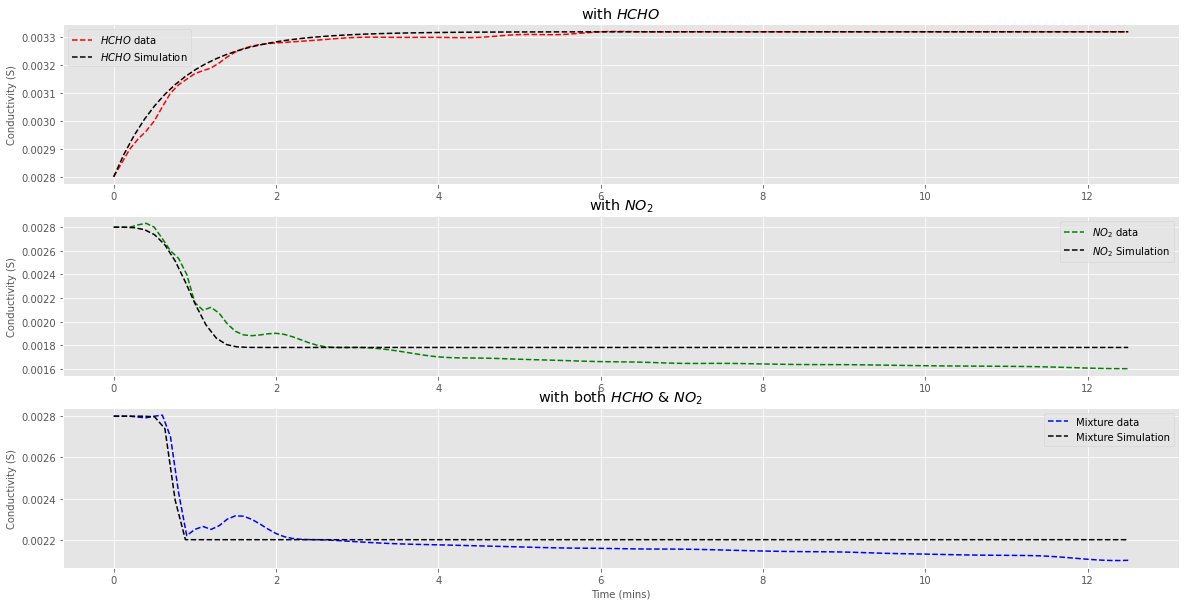

In [30]:
subplot(311)
plt.plot(xnew, f1(xnew), 'r--', t,g(-0.00052,0.75,1),'k--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$HCHO$ data', '$HCHO$ Simulation'], loc='best')
plt.title('with $HCHO$')

subplot(312)
plt.plot(xnew, f2(xnew), 'g--', t,g(0.00102,1,4),'k--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$NO_2$ data', '$NO_2$ Simulation'], loc='best')
plt.title('with $NO_2$')

subplot(313)
plt.plot(xnew, f3(xnew), 'b--', t,g(0.0006,0.75,13),'k--')
plt.xlabel('Time (mins)', {'size': 10})
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['Mixture data', 'Mixture Simulation'], loc='best')
plt.title('with both $HCHO$ & $NO_2$')

Text(0.5, 1.0, 'with $HCHO$')

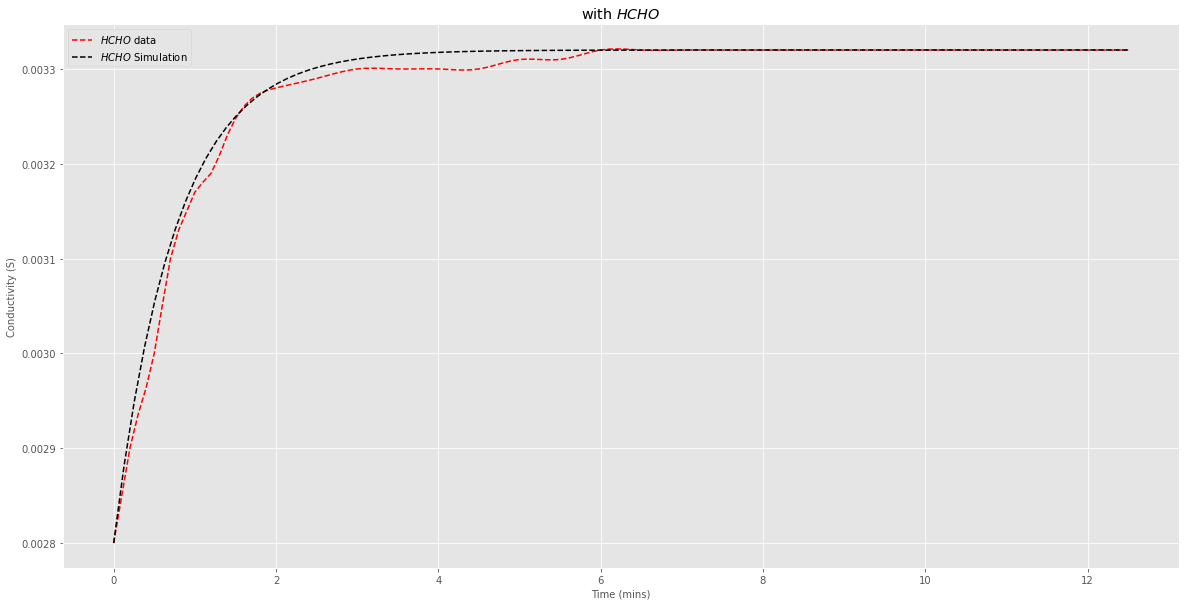

In [50]:
plt.plot(xnew, f1(xnew), 'r--', t,g(-0.00052,0.75,1),'k--')
plt.xlabel('Time (mins)', {'size': 10})
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$HCHO$ data', '$HCHO$ Simulation'], loc='best')
plt.title('with $HCHO$')

Text(0.5, 1.0, 'with $NO_2$')

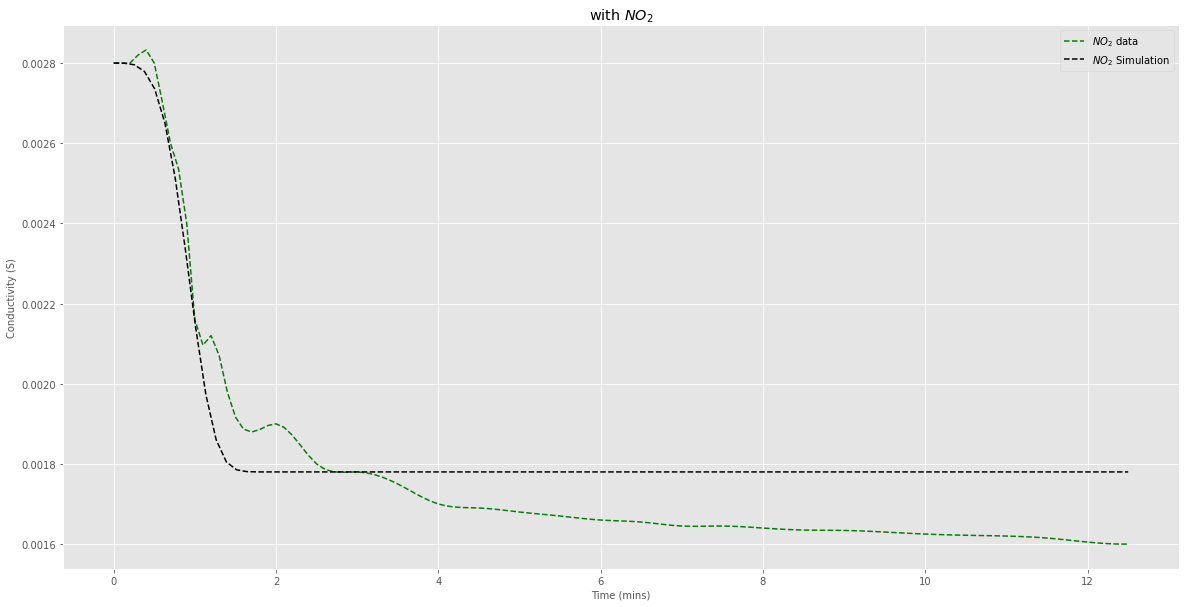

In [51]:
plt.plot(xnew, f2(xnew), 'g--', t,g(0.00102,1,4),'k--')
plt.xlabel('Time (mins)', {'size': 10})
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$NO_2$ data', '$NO_2$ Simulation'], loc='best')
plt.title('with $NO_2$')

Text(0.5, 1.0, 'with both $HCHO$ & $NO_2$')

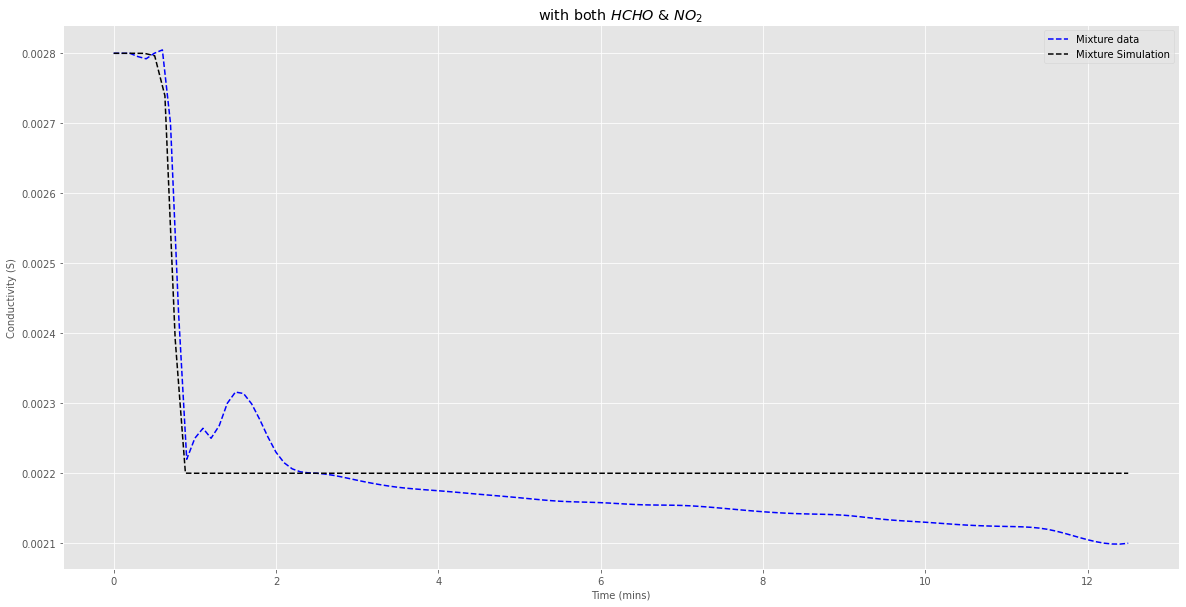

In [52]:
plt.plot(xnew, f3(xnew), 'b--', t,g(0.0006,0.75,13),'k--')
plt.xlabel('Time (mins)', {'size': 10})
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['Mixture data', 'Mixture Simulation'], loc='best')
plt.title('with both $HCHO$ & $NO_2$')

Text(0.5, 1.0, 'with both $HCHO$ & $NO_2$')

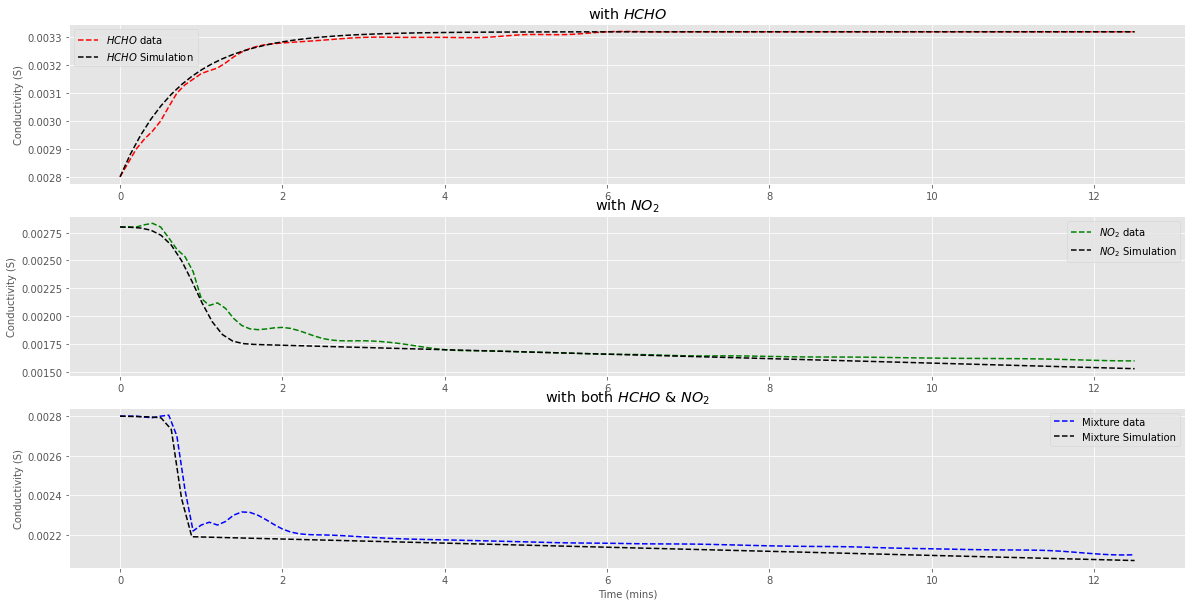

In [31]:
subplot(311)
plt.plot(xnew, f1(xnew), 'r--', t,g(-0.00052,0.75,1),'k--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$HCHO$ data', '$HCHO$ Simulation'], loc='best')
plt.title('with $HCHO$')


subplot(312)
plt.plot(xnew, f2(xnew), 'g--', t,g(0.00102,1,4)-(1/50000)*t,'k--')
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$NO_2$ data', '$NO_2$ Simulation'], loc='best')
plt.title('with $NO_2$')

subplot(313)
plt.plot(xnew, f3(xnew), 'b--', t,g(0.0006,0.75,13)-(3/290000)*t,'k--')
plt.xlabel('Time (mins)', {'size': 10})
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['Mixture data', 'Mixture Simulation'], loc='best')
plt.title('with both $HCHO$ & $NO_2$')

Text(0.5, 1.0, 'with $HCHO$')

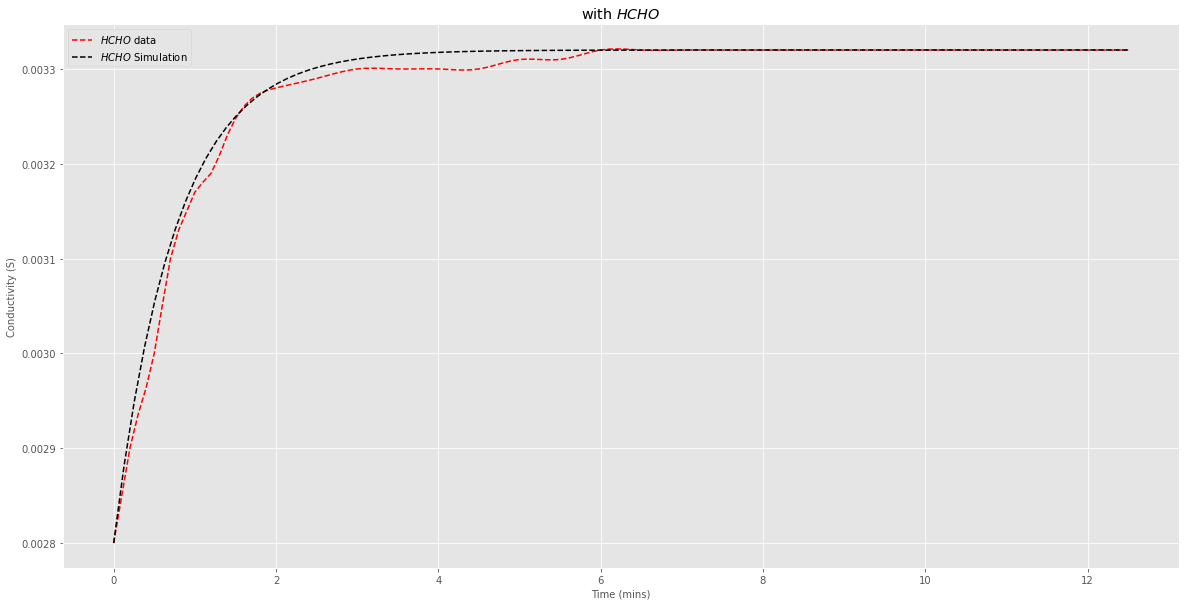

In [53]:
plt.plot(xnew, f1(xnew), 'r--', t,g(-0.00052,0.75,1),'k--')
plt.xlabel('Time (mins)', {'size': 10})
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$HCHO$ data', '$HCHO$ Simulation'], loc='best')
plt.title('with $HCHO$')

Text(0.5, 1.0, 'with $NO_2$')

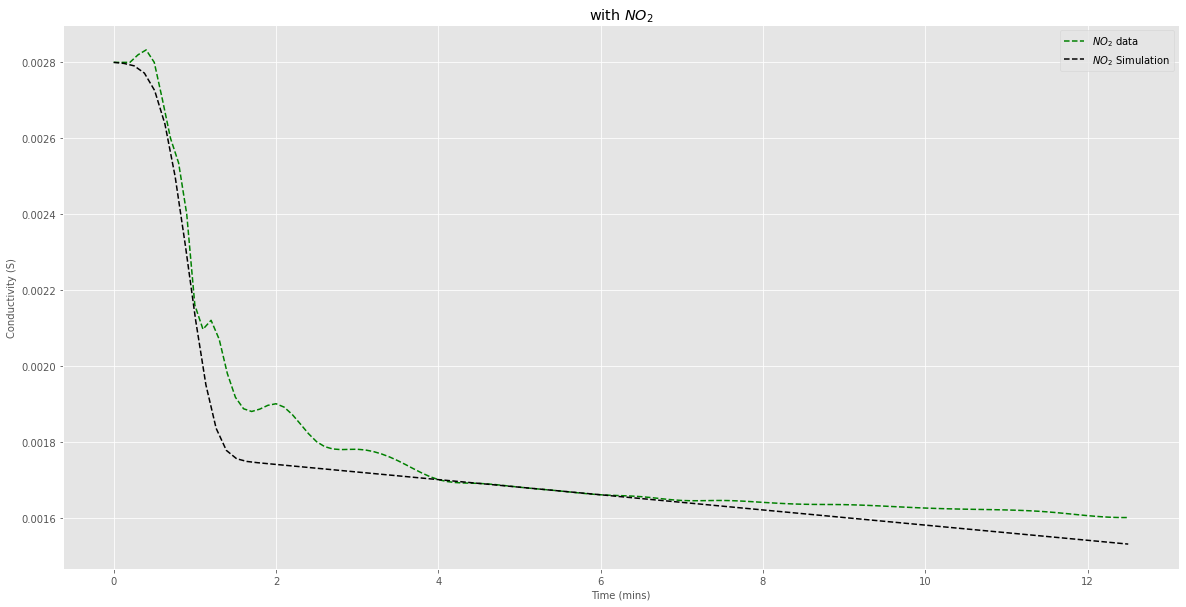

In [54]:
plt.plot(xnew, f2(xnew), 'g--', t,g(0.00102,1,4)-(1/50000)*t,'k--')
plt.xlabel('Time (mins)', {'size': 10})
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['$NO_2$ data', '$NO_2$ Simulation'], loc='best')
plt.title('with $NO_2$')


Text(0.5, 1.0, 'with both $HCHO$ & $NO_2$')

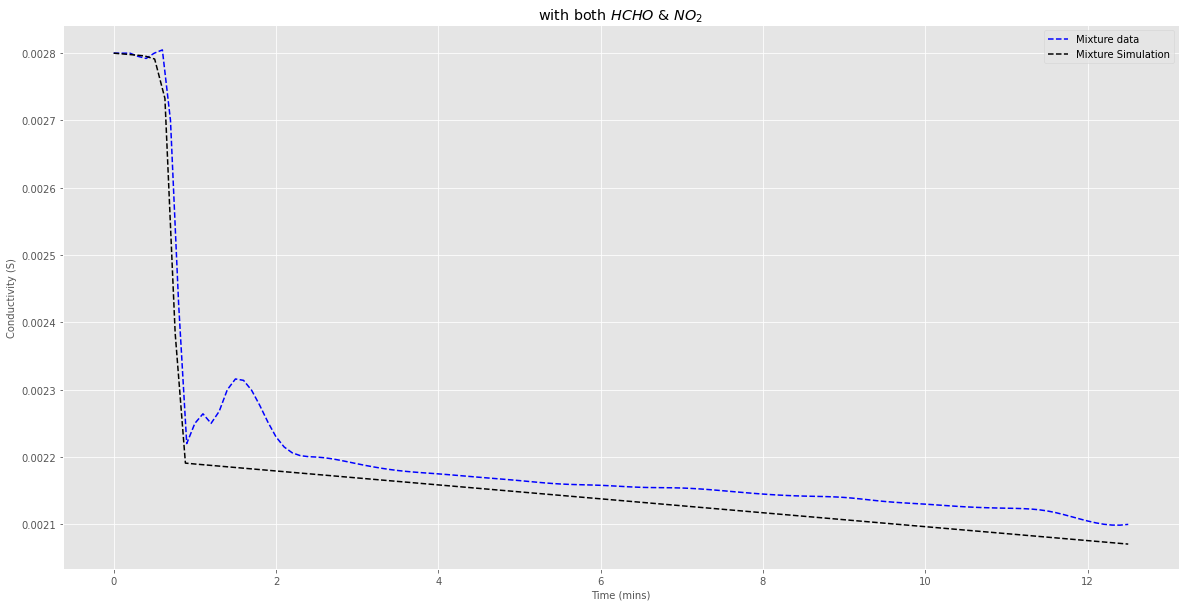

In [55]:
plt.plot(xnew, f3(xnew), 'b--', t,g(0.0006,0.75,13)-(3/290000)*t,'k--')
plt.xlabel('Time (mins)', {'size': 10})
plt.ylabel('Conductivity (S)', {'size': 10})
plt.legend(['Mixture data', 'Mixture Simulation'], loc='best')
plt.title('with both $HCHO$ & $NO_2$')

In [17]:
#def g(a,b,c,d,t=np.linspace(0,12.5,100)):
#   f=-(t/c)**d
#   h=e**f
#   i=np.sinc(10*t)
#   return a*h + b*i + (0.0028-a-b)

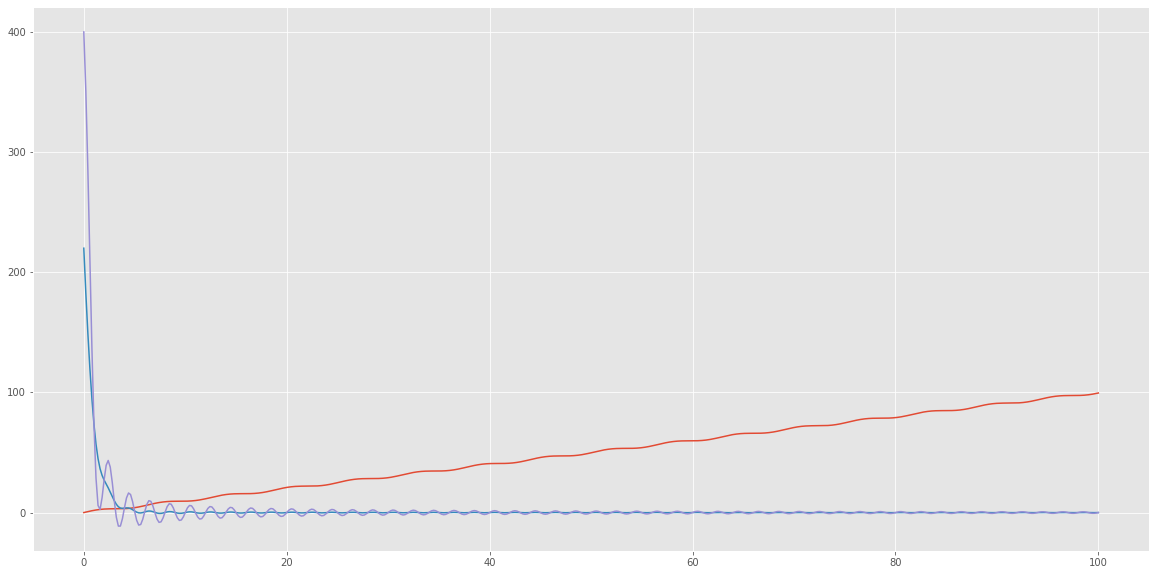

In [49]:
q=np.linspace(0,100,500)
plt.plot(q,q+np.sin(q))
plt.plot(q,(200*e**-q) + (20*np.sinc(q)))
plt.plot(q,(200*e**-q) + (200*np.sinc(q)))